In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [97]:
df = pd.read_csv('/content/datasets.csv')

In [98]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,rac,class
0,23,80,1.025,0,0,normal,normal,notpresent,notpresent,111,...,7200,5,no,no,no,good,no,no,2,notckd
1,30,70,1.015,0,0,?,normal,notpresent,notpresent,101,...,?,?,no,no,no,poor,no,no,2,ckd
2,59,70,1.01,1,3,abnormal,abnormal,notpresent,notpresent,424,...,10200,4.1,yes,yes,yes,good,no,no,0,ckd
3,45,80,1.025,0,0,normal,normal,notpresent,notpresent,82,...,9100,4.7,no,no,no,good,no,no,2,notckd
4,22,60,1.025,0,0,normal,normal,notpresent,notpresent,97,...,7900,6.4,no,no,no,good,no,no,2,notckd


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     350 non-null    object
 1   bp      350 non-null    object
 2   sg      350 non-null    object
 3   al      350 non-null    object
 4   su      350 non-null    object
 5   rbc     350 non-null    object
 6   pc      350 non-null    object
 7   pcc     350 non-null    object
 8   ba      350 non-null    object
 9   bgr     350 non-null    object
 10  bu      350 non-null    object
 11  sc      350 non-null    object
 12  sod     350 non-null    object
 13  pot     350 non-null    object
 14  hemo    350 non-null    object
 15  pcv     350 non-null    object
 16  wbcc    350 non-null    object
 17  rbcc    350 non-null    object
 18  htn     350 non-null    object
 19  dm      350 non-null    object
 20  cad     350 non-null    object
 21  appet   350 non-null    object
 22  pe      350 non-null    ob

In [100]:
df.shape

(350, 26)

In [101]:
df.bp.unique()

array(['80', '70', '60', '90', '100', '?', '50', '140', '120', '110',
       '180'], dtype=object)

In [102]:
mode_value = df.loc[df['age'] != '?', 'age'].mode()[0]
df['age'] = df['age'].replace('?', mode_value)

In [103]:
df.sg.unique()

array(['1.025', '1.015', '1.01', '1.02', '?', '1.005'], dtype=object)

In [104]:
for col in df.columns:
    # Find mode of the column excluding '?'
    mode_value = df.loc[df[col] != '?', col].mode()[0]

    # Replace '?' with the mode
    df[col] = df[col].replace('?', mode_value)

In [105]:
for col in df.columns:
  print(col," ", df[col].unique())

age   ['23' '30' '59' '45' '22' '48' '54' '42' '65' '73' '76' '28' '17' '75'
 '50' '46' '70' '32' '55' '60' '44' '57' '29' '51' '68' '69' '62' '47'
 '90' '34' '43' '67' '12' '56' '24' '6' '71' '63' '64' '37' '33' '74' '83'
 '49' '61' '38' '35' '80' '41' '40' '25' '21' '8' '53' '58' '52' '66' '72'
 '39' '14' '36' '19' '4' '5' '82' '11' '79' '20' '26' '15' '2' '3' '81']
bp   ['80' '70' '60' '90' '100' '50' '140' '120' '110' '180']
sg   ['1.025' '1.015' '1.01' '1.02' '1.005']
al   ['0' '1' '4' '3' '2' '5']
su   ['0' '3' '4' '1' '2' '5']
rbc   ['normal' 'abnormal']
pc   ['normal' 'abnormal']
pcc   ['notpresent' 'present']
ba   ['notpresent' 'present']
bgr   ['111' '101' '424' '82' '97' '95' '208' '132' '92' '107' '100' '131' '22'
 '110' '137' '76' '213' '120' '102' '273' '288' '233' '119' '83' '99' '93'
 '122' '425' '295' '264' '123' '94' '139' '90' '140' '108' '117' '138'
 '127' '124' '150' '118' '130' '144' '165' '307' '91' '246' '410' '81'
 '463' '113' '89' '129' '121' '109' '360' '303'

In [106]:
# 1. Strip spaces/tabs
df['pcv'] = df['pcv'].str.strip()

# 2. Replace '?' with NaN
df['pcv'] = df['pcv'].replace('?', np.nan)

# 3. Convert to numeric (float temporarily because of NaN)
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')

# 4. Fill NaN with mode (most frequent value)
mode_value = int(df['pcv'].mode()[0])
df['pcv'] = df['pcv'].fillna(mode_value)

# 5. Convert the column to int
df['pcv'] = df['pcv'].astype(int)

In [107]:
# 1. Strip spaces/tabs
df['wbcc'] = df['wbcc'].str.strip()

# 2. Replace '?' with NaN
df['wbcc'] = df['wbcc'].replace('?', np.nan)

# 3. Convert to numeric (float temporarily because of NaN)
df['wbcc'] = pd.to_numeric(df['wbcc'], errors='coerce')

# 4. Fill NaN with mode (most frequent value)
mode_value = int(df['wbcc'].mode()[0])
df['wbcc'] = df['wbcc'].fillna(mode_value)

# 5. Convert the column to int
df['wbcc'] = df['wbcc'].astype(int)

In [108]:
# 1. Strip spaces/tabs
df['rbcc'] = df['rbcc'].str.strip()

# 2. Replace '?' with NaN
df['rbcc'] = df['rbcc'].replace('?', np.nan)

# 3. Convert to numeric (float temporarily because of NaN)
df['rbcc'] = pd.to_numeric(df['rbcc'], errors='coerce')

# 4. Fill NaN with mode (most frequent value)
mode_value = int(df['rbcc'].mode()[0])
df['rbcc'] = df['rbcc'].fillna(mode_value)

# 5. Convert the column to int
df['rbcc'] = df['rbcc'].astype(int)

In [109]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,rac,class
0,23,80,1.025,0,0,normal,normal,notpresent,notpresent,111,...,7200,5,no,no,no,good,no,no,2,notckd
1,30,70,1.015,0,0,normal,normal,notpresent,notpresent,101,...,9800,5,no,no,no,poor,no,no,2,ckd
2,59,70,1.01,1,3,abnormal,abnormal,notpresent,notpresent,424,...,10200,4,yes,yes,yes,good,no,no,0,ckd
3,45,80,1.025,0,0,normal,normal,notpresent,notpresent,82,...,9100,4,no,no,no,good,no,no,2,notckd
4,22,60,1.025,0,0,normal,normal,notpresent,notpresent,97,...,7900,6,no,no,no,good,no,no,2,notckd


In [110]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'rac', 'class'],
      dtype='object')

In [111]:
cols = ['age','bp','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
for c in cols:
  df[c] = df[c].apply(pd.to_numeric)

In [112]:
df['sg'] = pd.to_numeric(df['sg'])
#bgr	bu	sc	sod	pot	hemo	pcv	wbcc	rbcc

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     350 non-null    int64  
 1   bp      350 non-null    int64  
 2   sg      350 non-null    float64
 3   al      350 non-null    int64  
 4   su      350 non-null    int64  
 5   rbc     350 non-null    object 
 6   pc      350 non-null    object 
 7   pcc     350 non-null    object 
 8   ba      350 non-null    object 
 9   bgr     350 non-null    int64  
 10  bu      350 non-null    float64
 11  sc      350 non-null    float64
 12  sod     350 non-null    float64
 13  pot     350 non-null    float64
 14  hemo    350 non-null    float64
 15  pcv     350 non-null    int64  
 16  wbcc    350 non-null    int64  
 17  rbcc    350 non-null    int64  
 18  htn     350 non-null    object 
 19  dm      350 non-null    object 
 20  cad     350 non-null    object 
 21  appet   350 non-null    object 
 22  pe

In [114]:
for col in df.columns:
  print(df[col].unique())

[23 30 59 45 22 48 54 42 65 73 76 28 17 75 50 46 70 32 55 60 44 57 29 51
 68 69 62 47 90 34 43 67 12 56 24  6 71 63 64 37 33 74 83 49 61 38 35 80
 41 40 25 21  8 53 58 52 66 72 39 14 36 19  4  5 82 11 79 20 26 15  2  3
 81]
[ 80  70  60  90 100  50 140 120 110 180]
[1.025 1.015 1.01  1.02  1.005]
[0 1 4 3 2 5]
[0 3 4 1 2 5]
['normal' 'abnormal']
['normal' 'abnormal']
['notpresent' 'present']
['notpresent' 'present']
[111 101 424  82  97  95 208 132  92 107 100 131  22 110 137  76 213 120
 102 273 288 233 119  83  99  93 122 425 295 264 123  94 139  90 140 108
 117 138 127 124 150 118 130 144 165 307  91 246 410  81 463 113  89 129
 121 109 360 303  79 204 134 256 203 172 158  78 106 114 380  74 156 490
  70  88  75 215 128 153 224 323 146 192 263 294 253  85 141 169 125 252
 133 268 352 171 182 105 308 103 115 160 159 207 269 415 112 104  96 238
 143 234 447 210 270 309 214 250 261  84  87 184 423  80 163 280  86 241
 201 162 242 219 255 176 341 220 173 248 298 226 251 148 297]
[ 34.  

In [65]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'rac', 'class'],
      dtype='object')

In [115]:
df['dm'] = df['dm'].str.strip().str.lower()
df['cad'] = df['cad'].str.strip()
print(df.dm.unique())

['no' 'yes']


In [116]:
df['rbc'] = df['rbc'].map({'normal': 0, 'abnormal': 1})
df['pc'] = df['pc'].map({'normal': 0, 'abnormal': 1})
df['appet'] = df['appet'].map({'poor': 0, 'good': 1})
df['class'] = df['class'].map({'notckd': 0, 'ckd': 1})


In [117]:
df['pcc'] = df['pcc'].map({'notpresent': 0, 'present': 1})
df['ba'] = df['ba'].map({'notpresent': 0, 'present': 1})


In [118]:
colu = ['htn', 'dm', 'cad','pe', 'ane']
for c in colu:
  df[c] = df[c].map({'yes': 1, 'no': 0})


In [119]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,rac,class
0,23,80,1.025,0,0,0,0,0,0,111,...,7200,5,0,0,0,1,0,0,2,0
1,30,70,1.015,0,0,0,0,0,0,101,...,9800,5,0,0,0,0,0,0,2,1
2,59,70,1.010,1,3,1,1,0,0,424,...,10200,4,1,1,1,1,0,0,0,1
3,45,80,1.025,0,0,0,0,0,0,82,...,9100,4,0,0,0,1,0,0,2,0
4,22,60,1.025,0,0,0,0,0,0,97,...,7900,6,0,0,0,1,0,0,2,0


In [120]:
for col in df.columns:
  print(df[col].unique())

[23 30 59 45 22 48 54 42 65 73 76 28 17 75 50 46 70 32 55 60 44 57 29 51
 68 69 62 47 90 34 43 67 12 56 24  6 71 63 64 37 33 74 83 49 61 38 35 80
 41 40 25 21  8 53 58 52 66 72 39 14 36 19  4  5 82 11 79 20 26 15  2  3
 81]
[ 80  70  60  90 100  50 140 120 110 180]
[1.025 1.015 1.01  1.02  1.005]
[0 1 4 3 2 5]
[0 3 4 1 2 5]
[0 1]
[0 1]
[0 1]
[0 1]
[111 101 424  82  97  95 208 132  92 107 100 131  22 110 137  76 213 120
 102 273 288 233 119  83  99  93 122 425 295 264 123  94 139  90 140 108
 117 138 127 124 150 118 130 144 165 307  91 246 410  81 463 113  89 129
 121 109 360 303  79 204 134 256 203 172 158  78 106 114 380  74 156 490
  70  88  75 215 128 153 224 323 146 192 263 294 253  85 141 169 125 252
 133 268 352 171 182 105 308 103 115 160 159 207 269 415 112 104  96 238
 143 234 447 210 270 309 214 250 261  84  87 184 423  80 163 280  86 241
 201 162 242 219 255 176 341 220 173 248 298 226 251 148 297]
[ 34.  106.   55.   49.   18.  163.   89.   24.   37.   33.  164.   29.
   1.

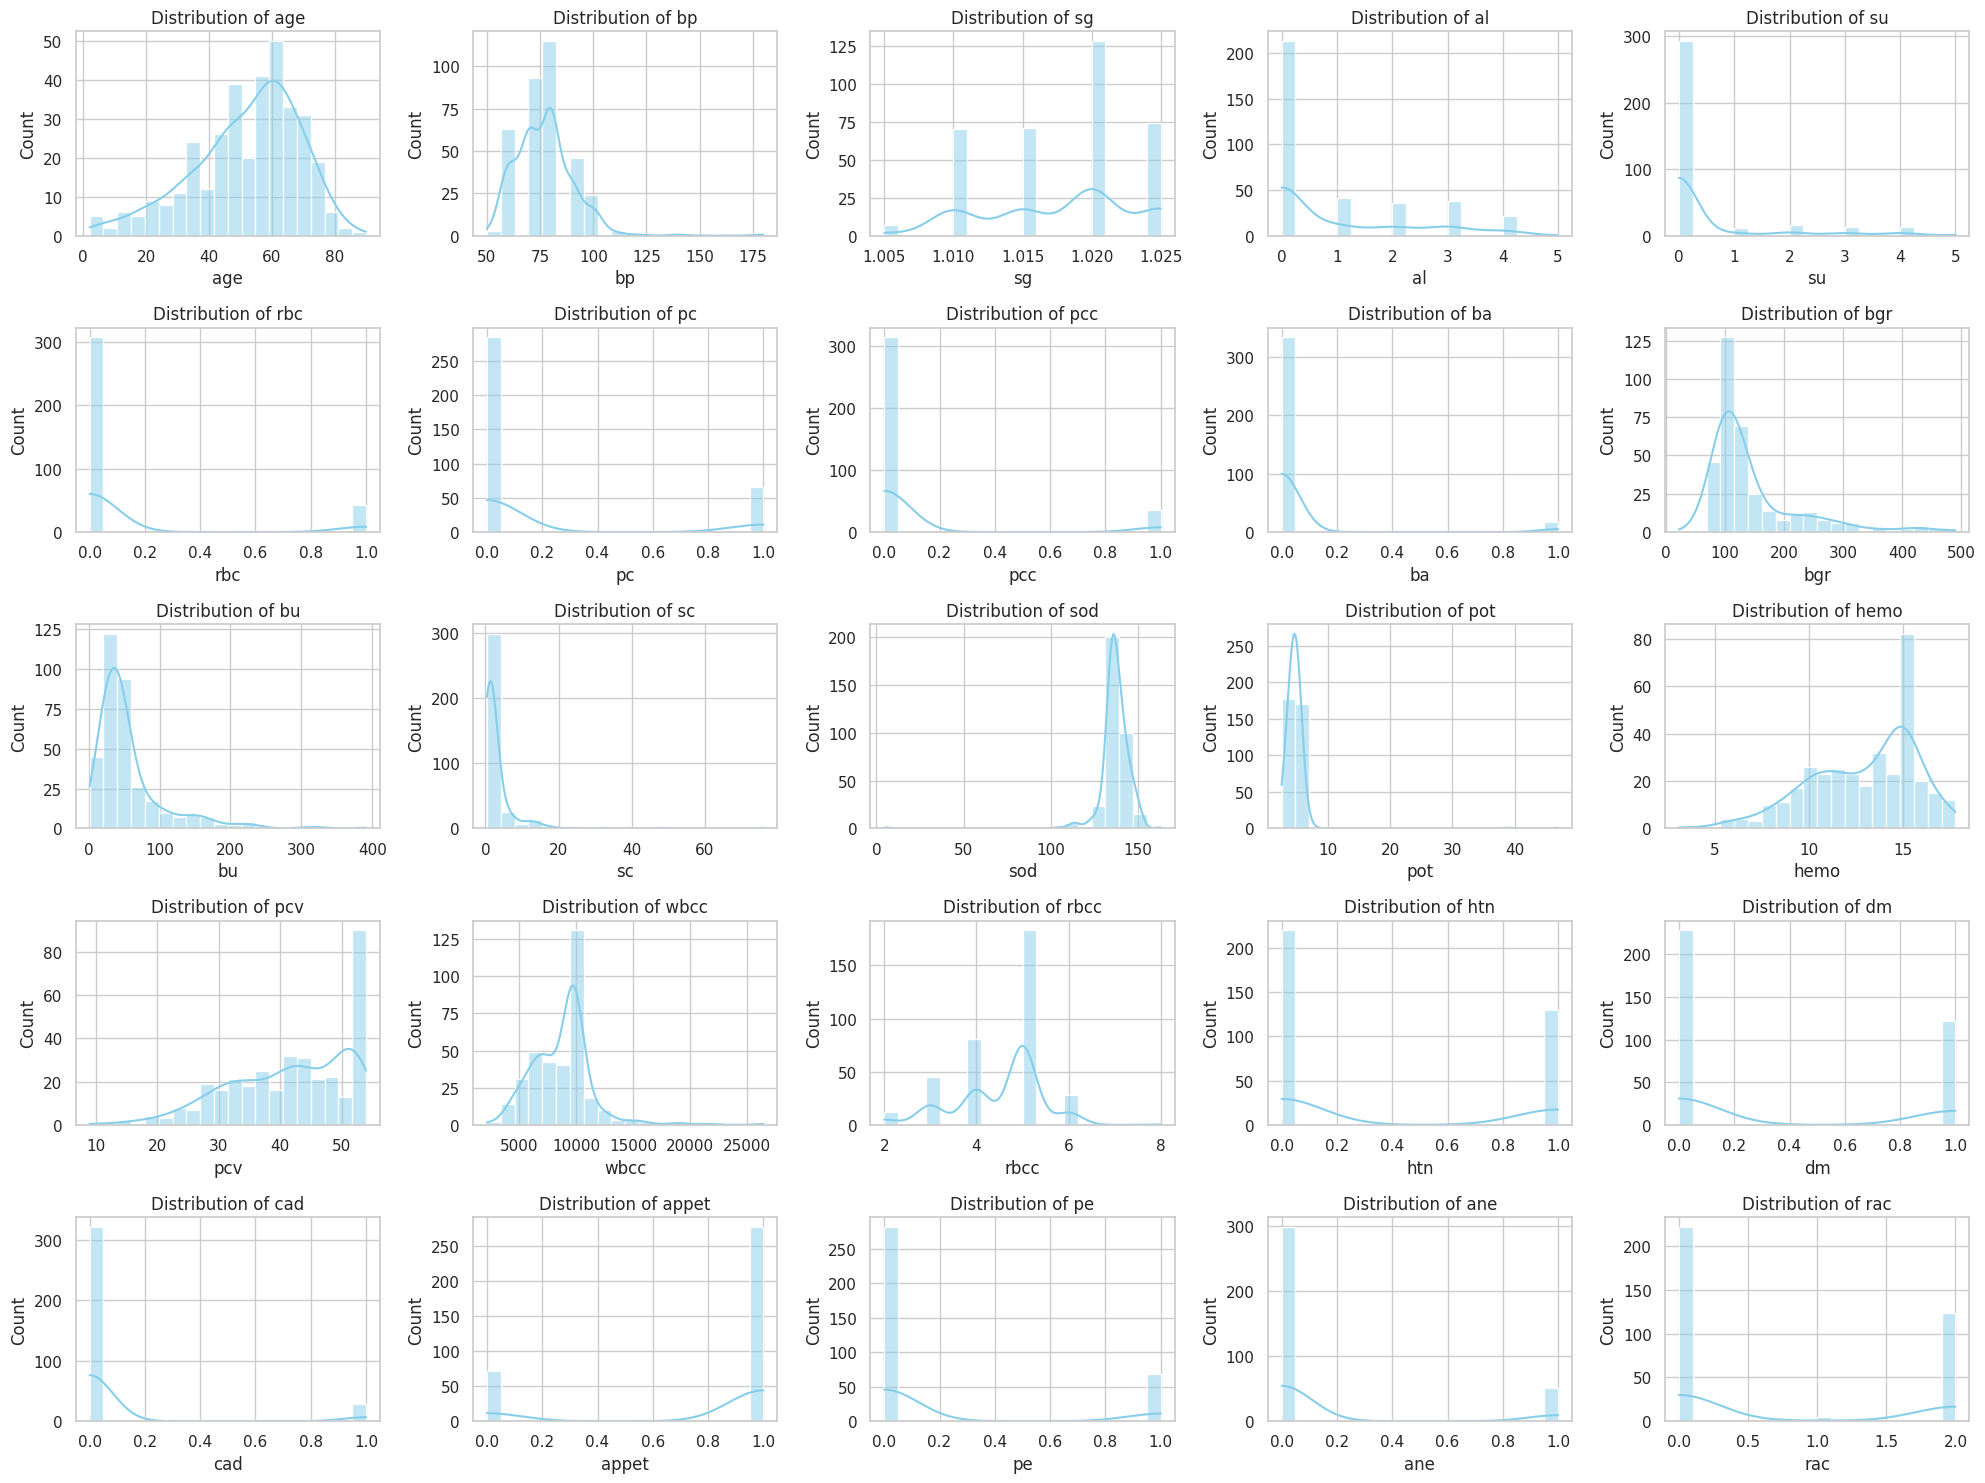

In [129]:
numeric_cols = df.columns.drop('class')  # exclude target if you want

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)  # adjust grid based on number of columns
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


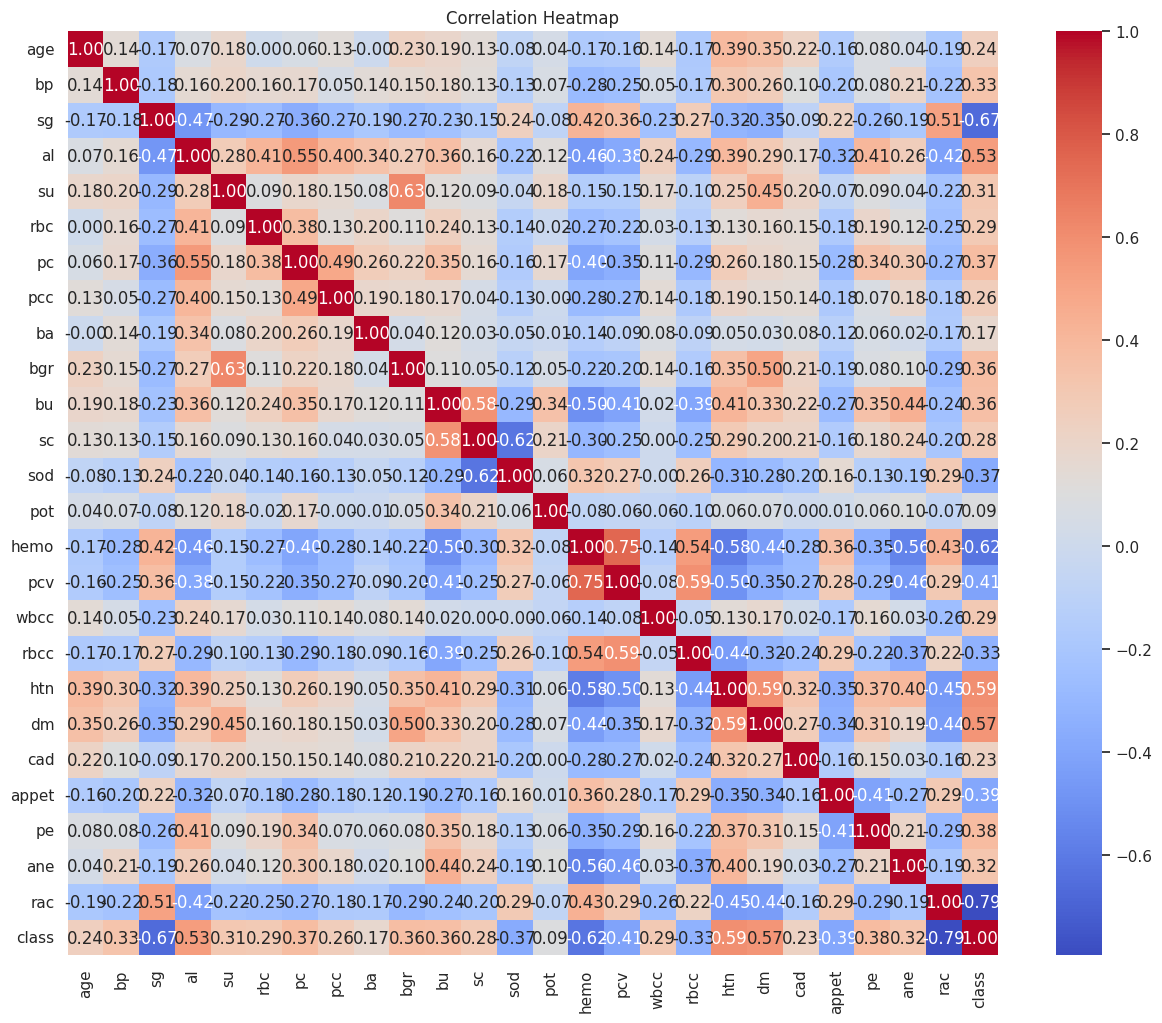

In [130]:
plt.figure(figsize=(15, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


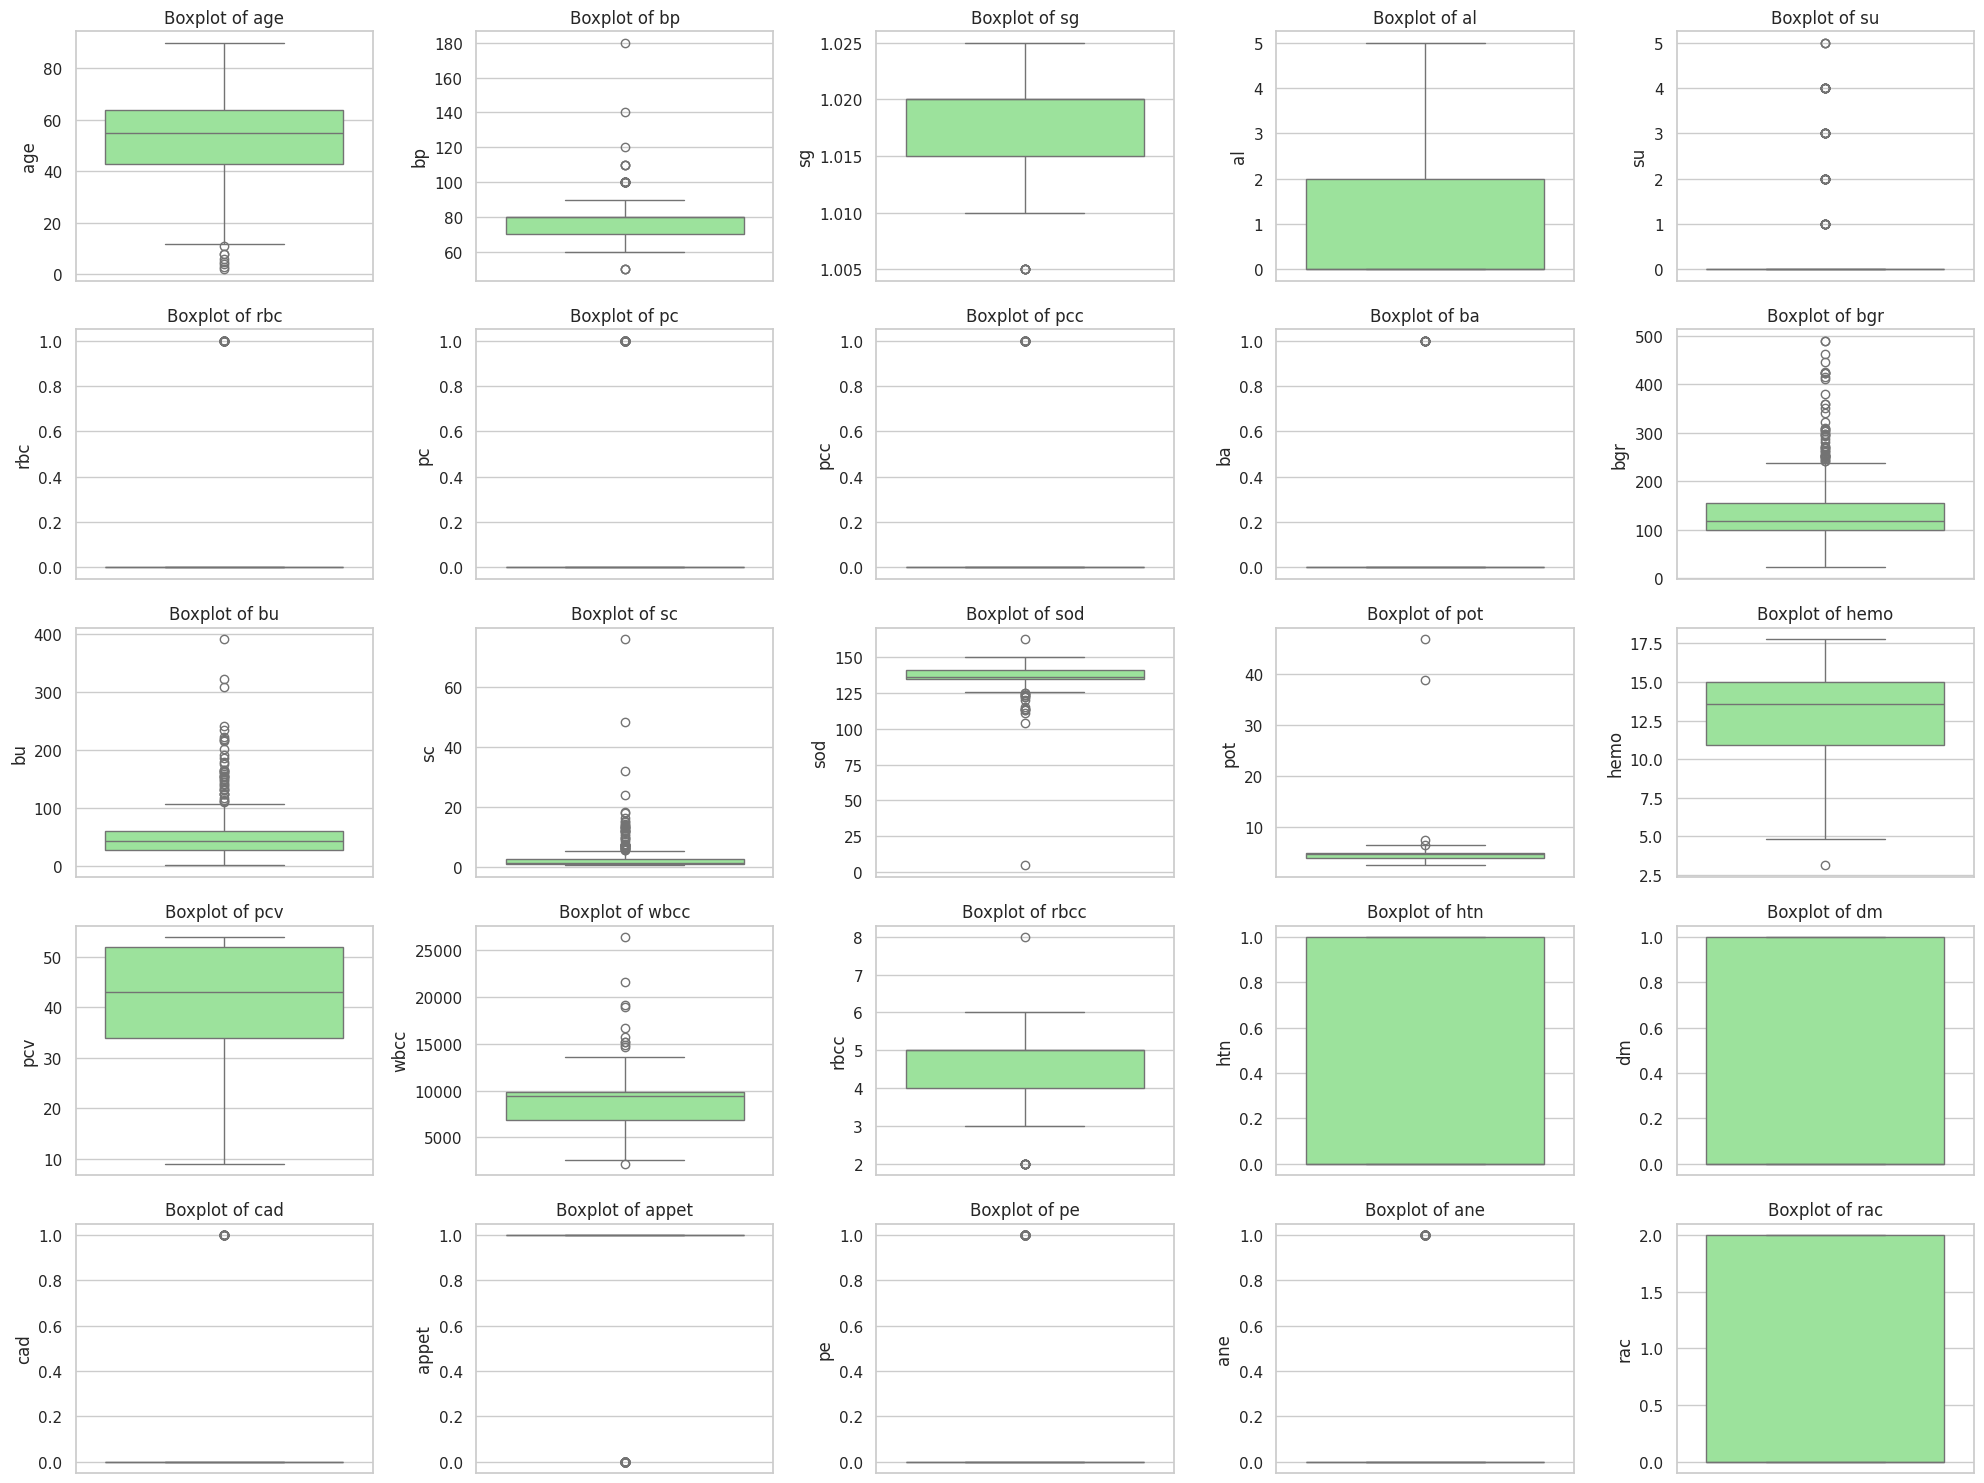

In [131]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3853029811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


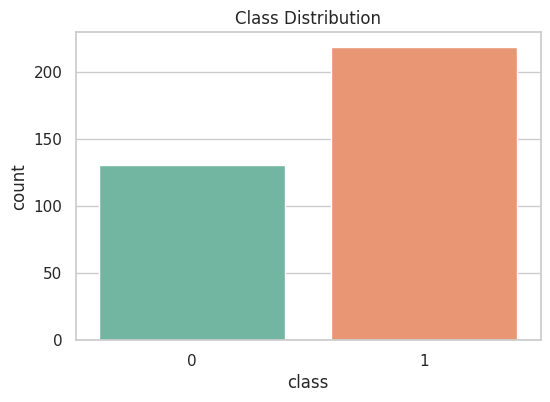

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.show()


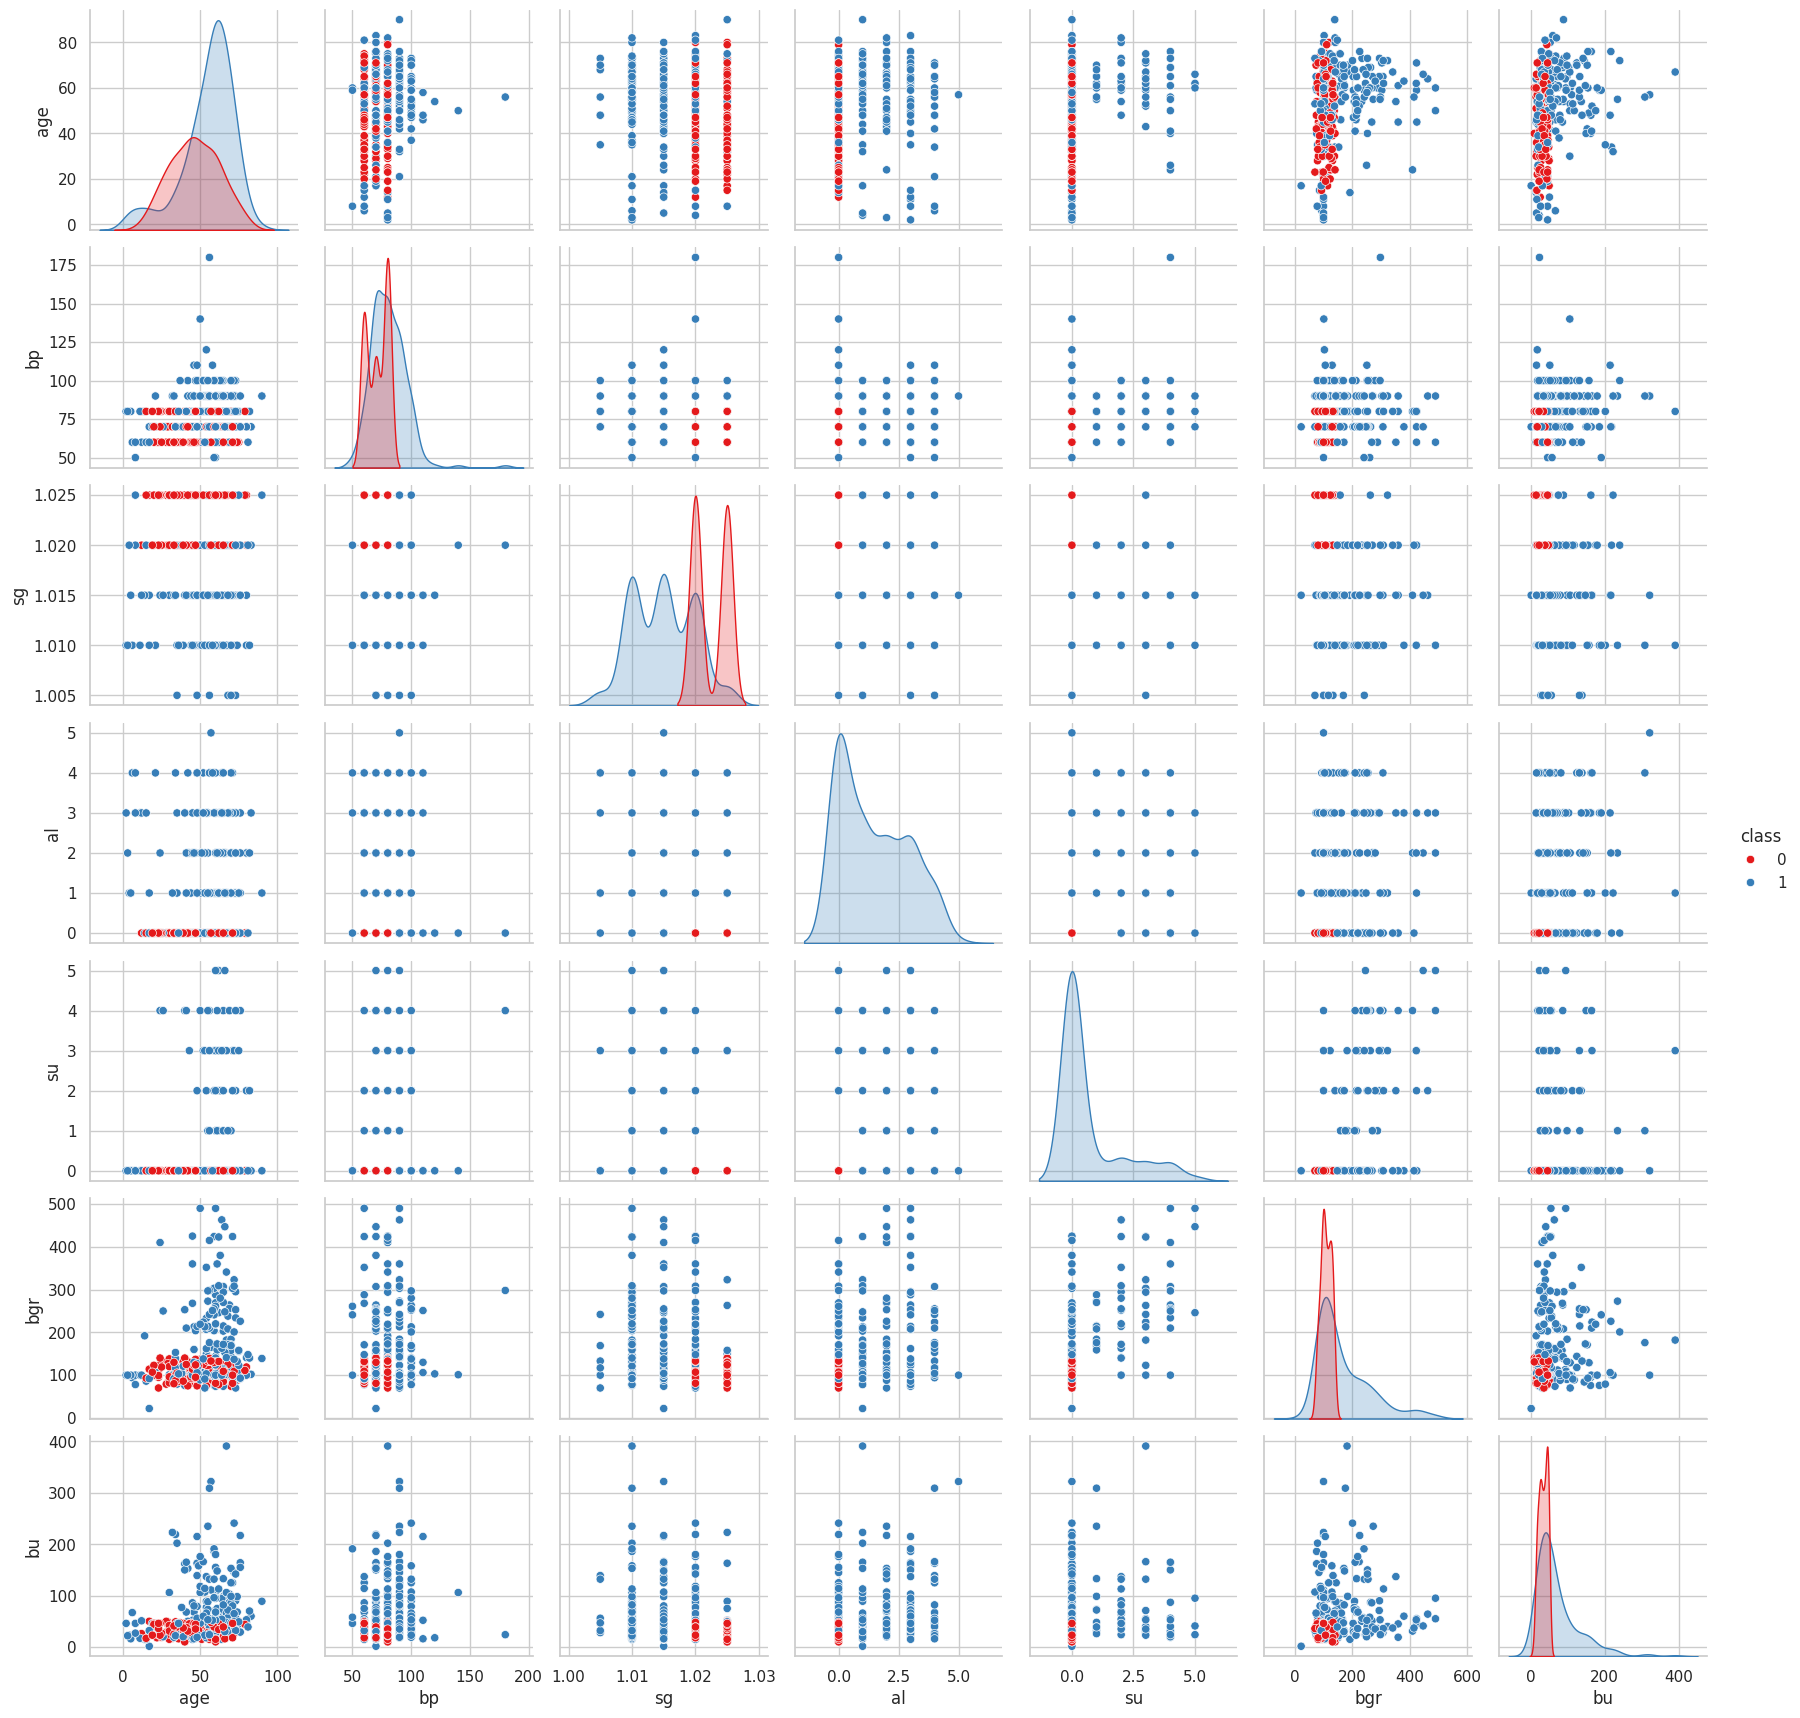

In [133]:
subset_cols = ['age','bp','sg','al','su','bgr','bu','class']
sns.pairplot(df[subset_cols], hue='class', palette='Set1')
plt.show()


/tmp/ipython-input-2223408896.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


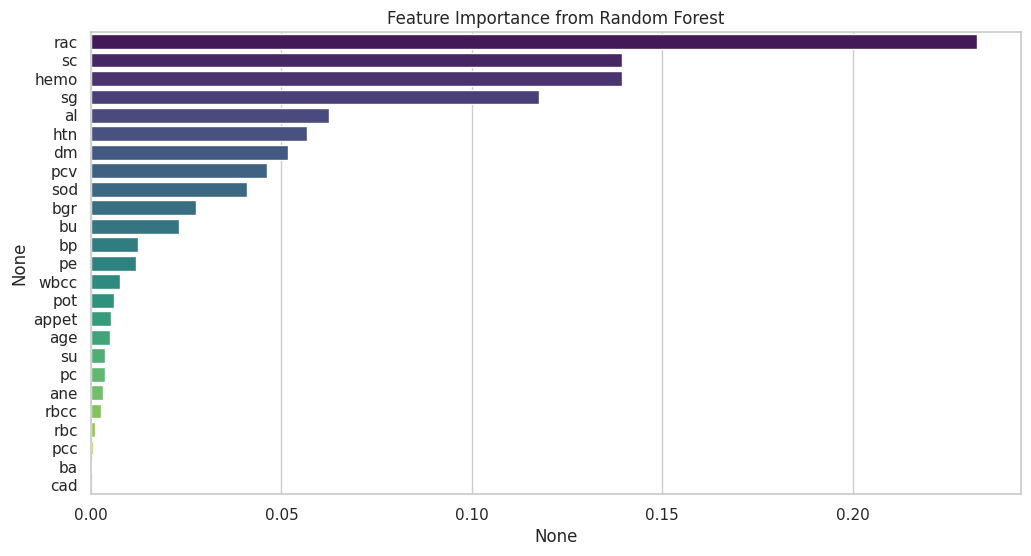

In [134]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('class', axis=1)
y = df['class']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [122]:
# Example: df is your DataFrame
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target

# Optional: scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [124]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [139]:
import joblib
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate training accuracy
    train_acc = model.score(X_train, y_train)

    # Calculate test accuracy
    test_acc = model.score(X_test, y_test)

    print(f"--- {name} ---")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

    # Save the trained model as .pkl
    filename = f"{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"{name} saved as {filename}\n")

--- Logistic Regression ---
Training Accuracy: 1.0000
Test Accuracy: 0.9886
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        51

    accuracy                           0.99        88
   macro avg       0.99      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88



Logistic Regression saved as logistic_regression.pkl

--- Random Forest ---
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        51

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



Random Forest saved as random_forest.pkl

--- SVM ---
Training Accuracy: 1.0000
Test Accuracy:

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     350 non-null    int64  
 1   bp      350 non-null    int64  
 2   sg      350 non-null    float64
 3   al      350 non-null    int64  
 4   su      350 non-null    int64  
 5   rbc     350 non-null    int64  
 6   pc      350 non-null    int64  
 7   pcc     350 non-null    int64  
 8   ba      350 non-null    int64  
 9   bgr     350 non-null    int64  
 10  bu      350 non-null    float64
 11  sc      350 non-null    float64
 12  sod     350 non-null    float64
 13  pot     350 non-null    float64
 14  hemo    350 non-null    float64
 15  pcv     350 non-null    int64  
 16  wbcc    350 non-null    int64  
 17  rbcc    350 non-null    int64  
 18  htn     350 non-null    int64  
 19  dm      350 non-null    int64  
 20  cad     350 non-null    int64  
 21  appet   350 non-null    int64  
 22  pe

In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.9885714285714287


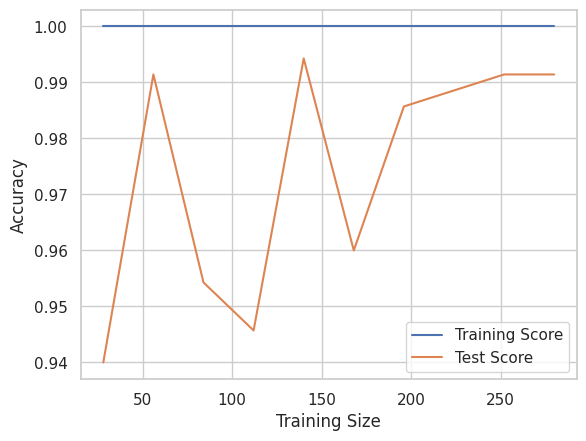

In [136]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,10))

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
